Importing necessary Libraries

In [1]:
import os
import pandas as pd
from collections import Counter
from bisect import bisect_left

import matplotlib.colors as mcolors

import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'd:\\_MISC\\adhaar_data'

Combining all 4 biometric csv files into single dataframe

In [2]:
# Get all csv files from api_data_aadhar_enrolment directory
csv_files = [f for f in os.listdir('api_data_aadhar_biometric') if f.endswith('.csv')]

# Read and combine all csv files
dfs = [pd.read_csv(os.path.join('api_data_aadhar_biometric', file)) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)

# Save combined dataframe to csv
# df.to_csv('try.csv', index=False)
print(f'Combined {len(csv_files)} files into single dataframe')
print(df.shape)

Combined 4 files into single dataframe
(1861108, 6)


Check Data-Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [4]:
df.nunique()

date               89
state              57
district          974
pincode         19707
bio_age_5_17     2121
bio_age_17_      2212
dtype: int64

Convert date column to datetime format and add Month Column

In [5]:
df['date'] = pd.to_datetime(df['date'],format = "%d-%m-%Y")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.2+ MB


Checking state column for cleaning

In [7]:
df['state'].value_counts()

state
Tamil Nadu                                  184568
Andhra Pradesh                              172034
Uttar Pradesh                               155242
Maharashtra                                 151104
Karnataka                                   141227
West Bengal                                 130735
Kerala                                       98511
Gujarat                                      89531
Odisha                                       86476
Bihar                                        83398
Telangana                                    82579
Rajasthan                                    79724
Madhya Pradesh                               70080
Punjab                                       48108
Assam                                        47643
Jharkhand                                    36625
Chhattisgarh                                 31992
Himachal Pradesh                             30385
Haryana                                      26429
Uttarakhand              

In [8]:
df.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

Checking For spelling Mistakes

In [9]:
print('Total unique values in state column :',len(df['state'].unique()))
sorted(df['state'].unique())

Total unique values in state column : 57


['Andaman & Nicobar Islands',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhatisgarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'ODISHA',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tamilnadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'Uttaranchal',
 'WEST BENGAL',
 'WESTBENGAL',
 'West  Bengal',
 'West Bangal',
 'West Bengal',
 'West bengal',
 'Westbengal',
 'andhra pradesh',
 'odisha',
 'west Bengal']

Gathering Pin-code Data

In [10]:
# Pincode data taken from
# https://www.data.gov.in/resource/all-india-pincode-directory-till-last-month

#Extracted all Pincodes and respective [district,statename]
pin_df = pd.read_csv('./pin_code_data.csv')
# Extract unique pincode to [district, statename] mapping
pincode_mapping = pin_df[['pincode', 'district', 'statename']].dropna().drop_duplicates(subset=['pincode']).set_index('pincode')[['district', 'statename']].to_dict('index')
print(len(pincode_mapping))
print(pincode_mapping[811315])

19486
{'district': 'JAMUI', 'statename': 'BIHAR'}


Find all pincodes that are present in our data but not in pincode_mapping

In [11]:
s1 = set(df['pincode'].unique())
s2 = set(pincode_mapping.keys())
needed_pins = sorted(s1.difference(s2))
print(len(needed_pins))
print(needed_pins)

948
[121705, 127020, 127110, 133021, 133105, 134011, 134115, 141017, 141124, 142028, 142051, 143003, 143026, 143104, 143110, 144004, 144011, 144012, 144013, 144014, 144203, 144304, 145021, 147506, 151107, 171302, 171303, 171304, 173020, 173028, 173216, 173219, 174401, 174402, 174403, 175122, 175137, 176120, 176121, 176122, 176123, 176126, 176213, 176219, 177030, 182117, 185111, 191123, 192102, 192306, 193198, 193202, 194402, 194403, 194404, 201308, 202389, 202390, 202391, 202392, 202393, 202394, 202395, 202396, 202397, 202398, 202399, 202410, 202411, 202412, 202413, 202414, 202415, 202421, 202520, 202521, 202522, 202523, 202524, 202525, 202526, 202527, 205130, 205135, 205141, 205142, 205145, 205147, 205151, 205152, 205302, 206301, 206302, 206303, 206451, 207501, 207502, 207503, 207504, 207505, 209201, 209407, 209506, 209715, 210010, 211009, 212210, 212623, 212660, 212662, 212666, 215126, 216221, 221102, 221113, 221209, 221210, 222101, 222102, 222103, 222107, 222108, 222110, 222111, 222

Use 3-Nearest Neighbors and 1-Nearest Neighbors to fill the missing data

In [12]:
left_pincode_mapping = {}
keys = sorted(pincode_mapping.keys())
n = len(keys)
_1nncount,_3nncount=0,0
for pin in needed_pins:
    pos = bisect_left(keys, pin)
    lo = max(0, pos - 3)
    hi = min(n, pos + 3)
    candidate_keys = keys[lo:hi]
    nearest = sorted(candidate_keys, key=lambda k: abs(k - pin))[:3]
    candidates = []
    for k in nearest:
        info = pincode_mapping.get(k)
        if info:
            candidates.append({
                'pincode': k,
                'statename': info.get('statename'),
                'district': info.get('district'),
                'distance': abs(k - pin)
            })
    
    # Check for majority in 3NN
    if candidates:
        state_counter = Counter(c['statename'] for c in candidates)
        district_counter = Counter(c['district'] for c in candidates)
        
        state_majority = state_counter.most_common(1)[0][1] > len(candidates) / 2
        district_majority = district_counter.most_common(1)[0][1] > len(candidates) / 2
        
        if state_majority and district_majority:
            assigned_state = state_counter.most_common(1)[0][0]
            assigned_district = district_counter.most_common(1)[0][0]
            method = '3NN'
            _3nncount+=1
        else:
            # Use 1-NN if no majority
            nearest_1nn = sorted(candidate_keys, key=lambda k: abs(k - pin))[:1]
            info = pincode_mapping.get(nearest_1nn[0])
            assigned_state = info.get('statename') if info else None
            assigned_district = info.get('district') if info else None
            method = '1NN'
            _1nncount+=1
    else:
        assigned_state = None
        assigned_district = None
        method = '1NN'
        _1nncount+=1
    
    left_pincode_mapping[pin] = {
        'method': method,
        'assigned': {'statename': assigned_state, 'district': assigned_district},
        'candidates': candidates
    }

print(f'left_pincode_mapping entries: {len(left_pincode_mapping)}')
print(f'1NN: {_1nncount} , 3NN: {_3nncount}')

left_pincode_mapping entries: 948
1NN: 24 , 3NN: 924


In [13]:
len(pincode_mapping),len(left_pincode_mapping)

(19486, 948)

In [14]:
len(set(pincode_mapping.keys()).intersection(set(left_pincode_mapping.keys())))

0

Check for any null values in statename or district in left_pincode_mapping

In [15]:
null_entries = []
for pin, data in left_pincode_mapping.items():
    assigned = data.get('assigned', {})
    if assigned.get('statename') is None or assigned.get('district') is None:
        null_entries.append({
            'pincode': pin,
            'statename': assigned.get('statename'),
            'district': assigned.get('district'),
            'method': data.get('method')
        })

print(f"Total entries with null values: {len(null_entries)}")
if null_entries:
    for entry in null_entries[:10]:  # Show first 10
        print(entry)

Total entries with null values: 0


Merge with pincode_mapping

In [16]:
for key in left_pincode_mapping:
    pincode_mapping[key] = left_pincode_mapping[key]['assigned']
len(set(pincode_mapping.keys()))

20434

Using Pin-code Data to clean State and District Columns

In [17]:
df['state_'] = df['pincode'].map(lambda x: pincode_mapping.get(x, {}).get('statename'))
df['district_'] = df['pincode'].map(lambda x: pincode_mapping.get(x, {}).get('district'))

df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_,district_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,HARYANA,MAHENDRAGARH
1,2025-03-01,Bihar,Madhepura,852121,144,369,BIHAR,MADHEPURA
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,JAMMU AND KASHMIR,POONCH
3,2025-03-01,Bihar,Bhojpur,802158,256,980,BIHAR,BHOJPUR
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,TAMIL NADU,MADURAI


Checking If it Worked

In [18]:
df.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
state_          0
district_       0
dtype: int64

In [19]:
df_null = df[df['state_'].isnull() | df['district_'].isnull()]
df_null['pincode'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
len(df['district'].unique()),len(df['district_'].unique())

(974, 740)

In [21]:
print(df[df['state']=='Uttarakhand']['district'].value_counts())
print(sum(df[df['state']=='Uttarakhand']['district'].value_counts()))
# We can Spot Hardwarand Haridwar as different, Garhwal is a region not a district


district
Pauri Garhwal        3207
Dehradun             2872
Almora               2355
Tehri Garhwal        1888
Chamoli              1851
Pithoragarh          1825
Nainital             1600
Haridwar             1590
Udham Singh Nagar    1251
Bageshwar            1050
Rudraprayag           997
Uttarkashi            841
Champawat             682
Hardwar               443
Garhwal               147
Name: count, dtype: int64
22599


In [22]:
print(df[df['state_']=='UTTARAKHAND']['district_'].value_counts())
print(sum(df[df['state_']=='UTTARAKHAND']['district_'].value_counts()))
# We can Spot Haridwar and Hardwar are merged, and Garhwal gets divided into pauri and tehri and other districts 

district_
PAURI GARHWAL       3357
DEHRADUN            2871
ALMORA              2335
HARIDWAR            2016
CHAMOLI             1908
PITHORAGARH         1869
TEHRI GARHWAL       1857
UDAM SINGH NAGAR    1512
NAINITAL            1253
BAGESHWAR           1155
RUDRA PRAYAG         941
UTTAR KASHI          870
CHAMPAWAT            641
Name: count, dtype: int64
22585


Checking Date Range

In [23]:
min(df['date']),max(df['date'])
#All data is from 2025

(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-29 00:00:00'))

 converting month to Month_name and adding Weekday column

In [24]:
df['Month_name'] = df['date'].dt.month_name()
df['Weekday'] = df['date'].dt.day_name()
#checking for random tuples
df.iloc[[10,34,304,1225]]

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_,district_,Month_name,Weekday
10,2025-03-01,Tamil Nadu,Salem,636119,103,63,TAMIL NADU,SALEM,March,Saturday
34,2025-03-01,Andhra Pradesh,Vizianagaram,535592,77,72,ANDHRA PRADESH,Parvathipuram Manyam,March,Saturday
304,2025-03-01,Andhra Pradesh,Kurnool,518452,290,95,ANDHRA PRADESH,KURNOOL,March,Saturday
1225,2025-03-01,West Bengal,Barddhaman,713363,63,90,WEST BENGAL,PASCHIM BARDHAMAN,March,Saturday


Define Regions using states

In [25]:
#Define 6 regions mapping for Indian states
regions = {
'ANDAMAN AND NICOBAR ISLANDS':'SOUTH',
 'ANDHRA PRADESH':'SOUTH',
 'ARUNACHAL PRADESH':'NORTH-EAST',
 'ASSAM':'NORTH-EAST',
 'BIHAR':'EAST',
 'CHANDIGARH':'NORTH',
 'CHHATTISGARH':'CENTRAL',
 'DELHI':'NORTH',
 'GOA':'WEST',
 'GUJARAT':'WEST',
 'HARYANA':'NORTH',
 'HIMACHAL PRADESH':'NORTH',
 'JAMMU AND KASHMIR':'NORTH',
 'JHARKHAND':'EAST',
 'KARNATAKA':'SOUTH',
 'KERALA':'SOUTH',
 'LADAKH':'NORTH',
 'LAKSHADWEEP':'SOUTH',
 'MADHYA PRADESH':'CENTRAL',
 'MAHARASHTRA':'WEST',
 'MANIPUR':'NORTH-EAST',
 'MEGHALAYA':'NORTH-EAST',
 'MIZORAM':'NORTH-EAST',
 'NAGALAND':'NORTH-EAST',
 'ODISHA':'EAST',
 'PUDUCHERRY':'SOUTH',
 'PUNJAB':'NORTH',
 'RAJASTHAN':'NORTH',
 'SIKKIM':'NORTH-EAST',
 'TAMIL NADU':'SOUTH',
 'TELANGANA':'SOUTH',
 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU':'WEST',
 'TRIPURA':'NORTH-EAST',
 'UTTAR PRADESH':'NORTH',
 'UTTARAKHAND':'NORTH',
 'WEST BENGAL':'EAST'}
# Add region column based on state
df['region'] = df['state_'].map(regions)
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_,district_,Month_name,Weekday,region
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,HARYANA,MAHENDRAGARH,March,Saturday,NORTH
1,2025-03-01,Bihar,Madhepura,852121,144,369,BIHAR,MADHEPURA,March,Saturday,EAST
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,JAMMU AND KASHMIR,POONCH,March,Saturday,NORTH
3,2025-03-01,Bihar,Bhojpur,802158,256,980,BIHAR,BHOJPUR,March,Saturday,EAST
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,TAMIL NADU,MADURAI,March,Saturday,SOUTH


Add a total column

In [26]:
df['total']=df['bio_age_5_17']+df['bio_age_17_']

drop the old district and state columns

In [27]:
df = df.drop(columns=['state', 'district'])
df = df[['date', 'Month_name', 'Weekday', 'state_', 'district_', 'pincode','region', 'bio_age_5_17', 'bio_age_17_','total']]
df.iloc[[10,34,304,1225]]

,date,Month_name,Weekday,state_,district_,pincode,region,bio_age_5_17,bio_age_17_,total
10,2025-03-01,March,Saturday,TAMIL NADU,SALEM,636119,SOUTH,103,63,166
34,2025-03-01,March,Saturday,ANDHRA PRADESH,Parvathipuram Manyam,535592,SOUTH,77,72,149
304,2025-03-01,March,Saturday,ANDHRA PRADESH,KURNOOL,518452,SOUTH,290,95,385
1225,2025-03-01,March,Saturday,WEST BENGAL,PASCHIM BARDHAMAN,713363,EAST,63,90,153


In [28]:
df.shape

(1861108, 10)

In [29]:
df.isnull().sum()

date            0
Month_name      0
Weekday         0
state_          0
district_       0
pincode         0
region          0
bio_age_5_17    0
bio_age_17_     0
total           0
dtype: int64

Now that cleaning is done, we can use the data for Exploratory Analysis

In [30]:
df.nunique()

date               89
Month_name          9
Weekday             7
state_             36
district_         740
pincode         19707
region              6
bio_age_5_17     2121
bio_age_17_      2212
total            3380
dtype: int64

In [31]:
numeric = df[['bio_age_5_17','bio_age_17_','total']]
# print(numeric.describe().to_string(float_format='{:,.3f}'.format))
print('Mean\n',numeric.mean().to_string(float_format='{:,.3f}'.format),"\n")
print('Median\n',numeric.median().to_string(float_format='{:,.3f}'.format),"\n")
print('Min\n',numeric.min().to_string(float_format='{:,.3f}'.format),"\n")
print('Max\n',numeric.max().to_string(float_format='{:,.3f}'.format),"\n")


Mean
 bio_age_5_17   18.391
bio_age_17_    19.094
total          37.485 

Median
 bio_age_5_17   3.000
bio_age_17_    4.000
total          8.000 

Min
 bio_age_5_17    0
bio_age_17_     0
total           0 

Max
 bio_age_5_17     8002
bio_age_17_      7625
total           13381 



# Time/Day based Trend-Analysis

In [32]:
df['Weekday'].value_counts()

Weekday
Tuesday      313583
Saturday     296437
Thursday     276973
Friday       273221
Monday       265809
Wednesday    232185
Sunday       202900
Name: count, dtype: int64

Checking which weekdays have most enrollments

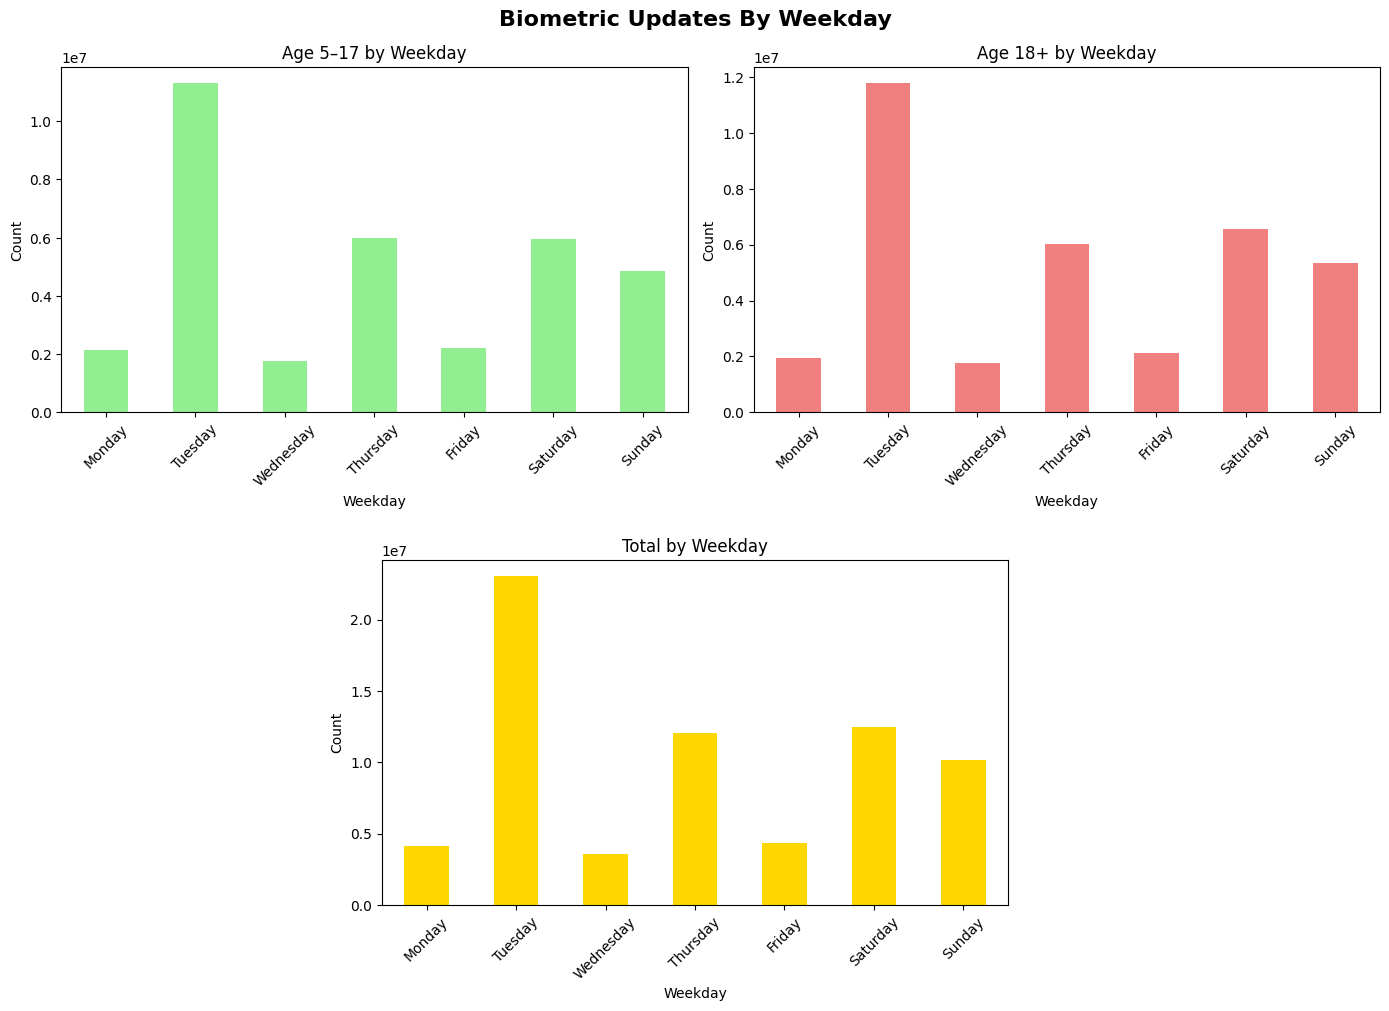

           bio_age_5_17  bio_age_17_     total
Weekday                                       
Monday          2145432      1958102   4103534
Tuesday        11298874     11764664  23063538
Wednesday       1757024      1778360   3535384
Thursday        5997744      6024097  12021841
Friday          2227032      2123694   4350726
Saturday        5942061      6553900  12495961
Sunday          4858688      5333423  10192111


In [33]:
# Group by weekday and sum all age groups
weekday_grouped = df.groupby('Weekday')[['bio_age_5_17','bio_age_17_', 'total']].sum()

# Reorder by day of week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_grouped = weekday_grouped.reindex(weekday_order)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row
weekday_grouped['bio_age_5_17'].plot(kind='bar', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5–17 by Weekday')
axes[0, 0].set_ylabel('Count')

weekday_grouped['bio_age_17_'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Weekday')
axes[0, 1].set_ylabel('Count')

# Bottom plot (same size)
weekday_grouped['total'].plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Weekday')
axes[1, 0].set_ylabel('Count')

# Remove unused subplot
fig.delaxes(axes[1, 1])

# Apply tight_layout FIRST
plt.tight_layout()

# Now center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,  # horizontal center
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)
fig.suptitle('Biometric Updates By Weekday', fontsize=16, fontweight='bold', y=1.02)
plt.show()
print(weekday_grouped)


MonthWise Analysis

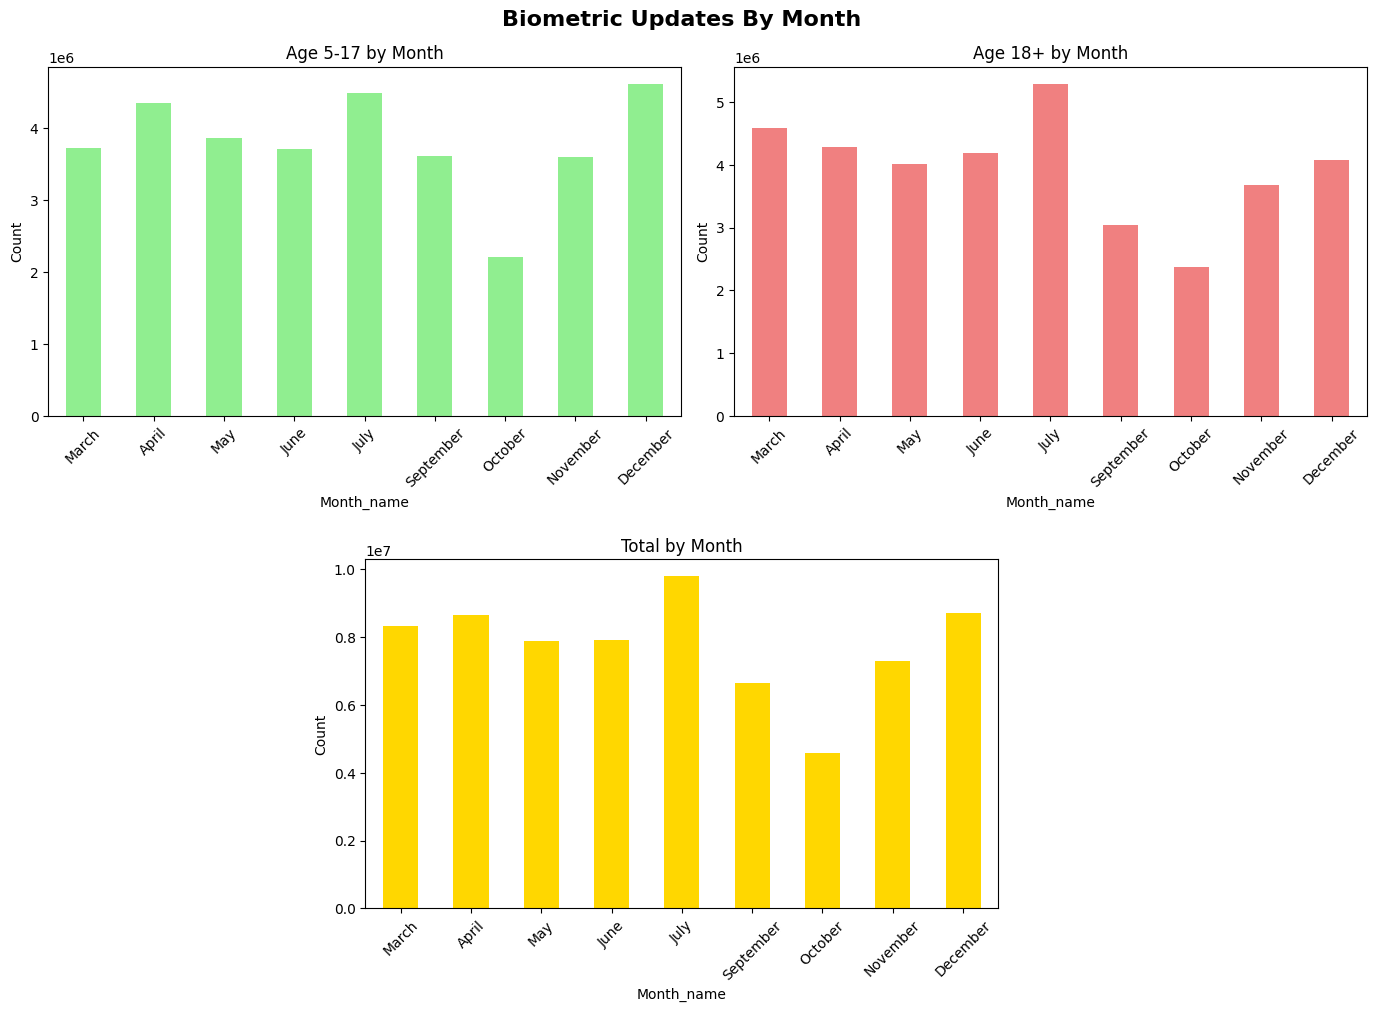

            bio_age_5_17  bio_age_17_    total
Month_name                                    
March            3733578      4588644  8322222
April            4356896      4284783  8641679
May              3868247      4011709  7879956
June             3710149      4189140  7899289
July             4499057      5293495  9792552
September        3610497      3044431  6654928
October          2215380      2367275  4582655
November         3608891      3676615  7285506
December         4624160      4080148  8704308


In [34]:
# Group by month and sum all age groups
month_grouped = df.groupby('Month_name')[['bio_age_5_17','bio_age_17_', 'total']].sum()

# Reorder by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_grouped = month_grouped.reindex([m for m in month_order if m in month_grouped.index])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row
month_grouped['bio_age_5_17'].plot(kind='bar', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by Month')
axes[0, 0].set_ylabel('Count')

month_grouped['bio_age_17_'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Month')
axes[0, 1].set_ylabel('Count')

# Bottom plot (same size)
month_grouped['total'].plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Month')
axes[1, 0].set_ylabel('Count')

# Remove unused subplot
fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Biometric Updates By Month', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(month_grouped)


Month over Month Growth rate

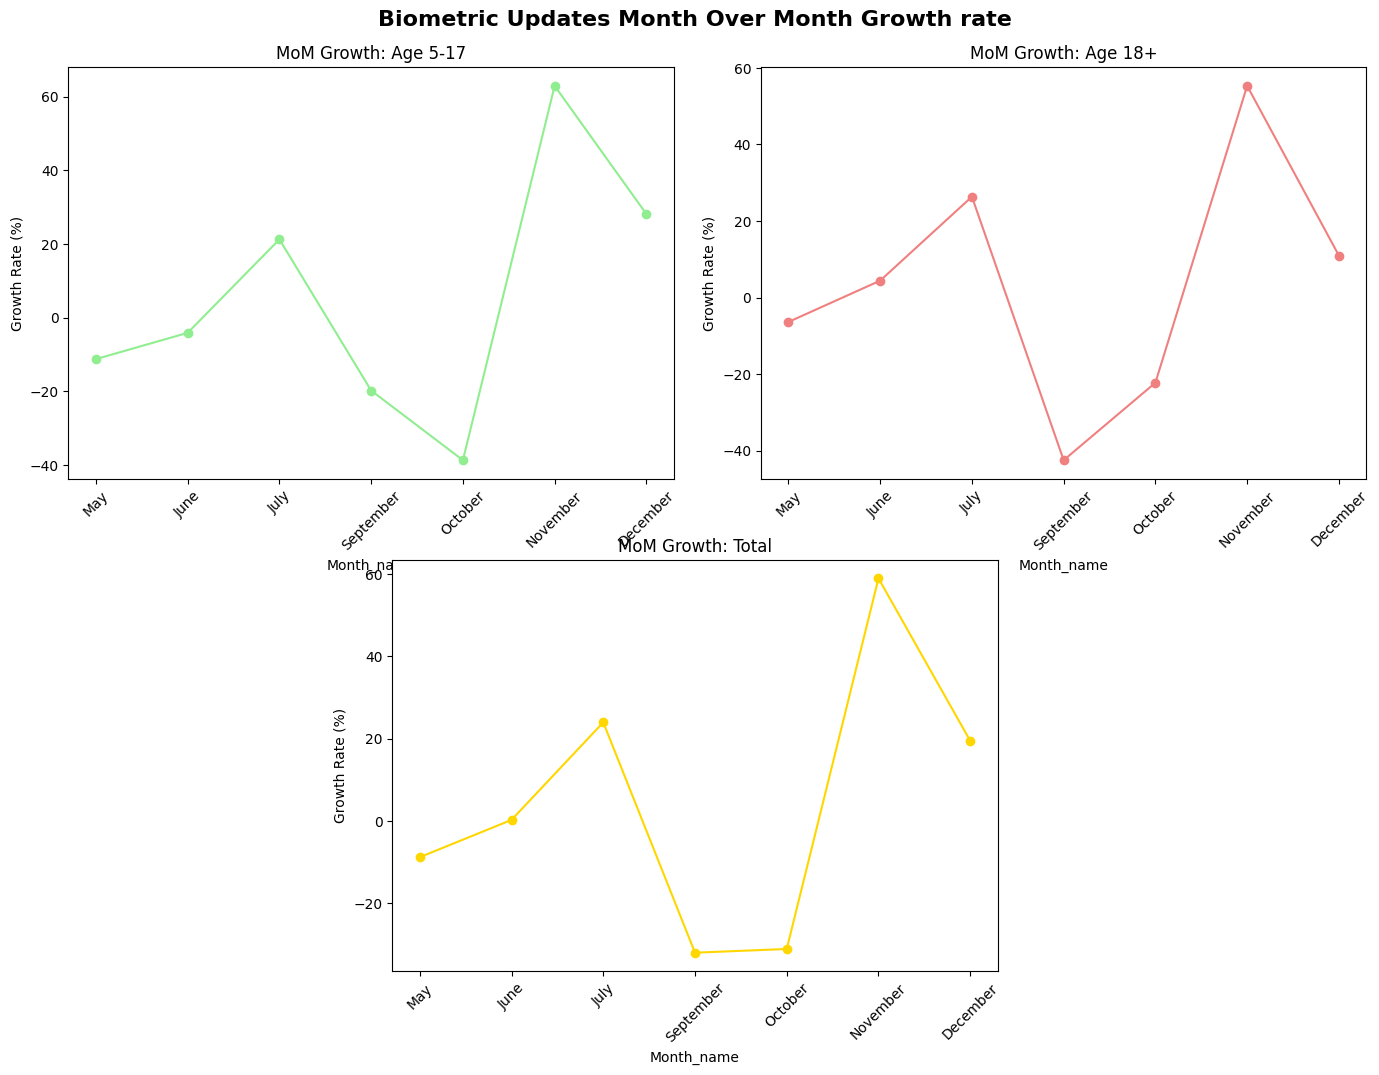

            bio_age_5_17  bio_age_17_      total
Month_name                                      
May           -11.215531    -6.373112  -8.814526
June           -4.087071     4.422828   0.245344
July           21.263513    26.362332  23.967512
September     -19.749916   -42.487317 -32.040923
October       -38.640581   -22.242449 -31.138924
November       62.901669    55.310008  58.980024
December       28.132437    10.975666  19.474310


In [35]:
# Calculate MoM growth rate (%)
# month_growth = month_grouped.pct_change() * 100
month_growth = month_grouped.pct_change().iloc[2:] * 100

# Create line plots with SAME colors as original code
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

month_growth['bio_age_5_17'].plot(ax=axes[0, 0], color='lightgreen', marker='o')
axes[0, 0].set_title('MoM Growth: Age 5-17')
axes[0, 0].set_ylabel('Growth Rate (%)')

month_growth['bio_age_17_'].plot(ax=axes[0, 1], color='lightcoral', marker='o')
axes[0, 1].set_title('MoM Growth: Age 18+')
axes[0, 1].set_ylabel('Growth Rate (%)')

month_growth['total'].plot(ax=axes[1, 0], color='gold', marker='o')
axes[1, 0].set_title('MoM Growth: Total')
axes[1, 0].set_ylabel('Growth Rate (%)')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Biometric Updates Month Over Month Growth rate', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(month_growth)


Date-Wise ( ascending )

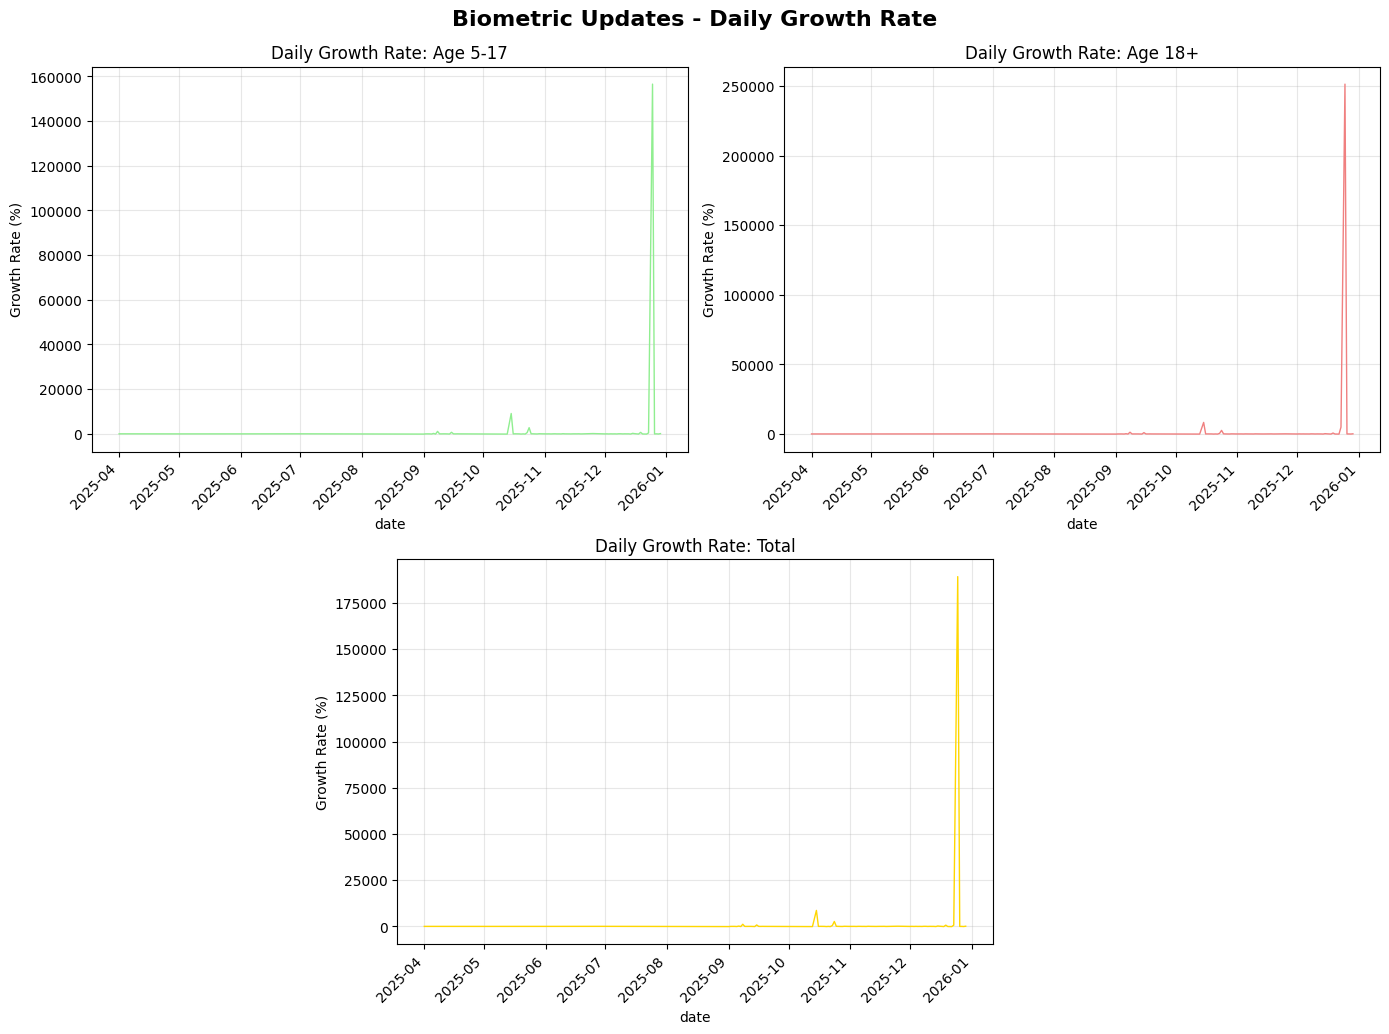

            bio_age_5_17  bio_age_17_       total
date                                             
2025-04-01     16.694924    -6.622022    3.838602
2025-05-01    -11.215531    -6.373112   -8.814526
2025-06-01     -4.087071     4.422828    0.245344
2025-07-01     21.263513    26.362332   23.967512
2025-09-01    -96.580528   -96.550200  -96.564134
2025-09-02     -3.057643    -7.693782   -5.573933
2025-09-03      1.947834    -4.150921   -1.287987
2025-09-04     -5.466145    -2.648420   -4.014502
2025-09-05    -65.875158   -70.289086  -68.181501
2025-09-06    174.613142   156.342549  165.698834


In [36]:
# Group by date and sum all age groups
daily_grouped = df.groupby('date')[['bio_age_5_17', 'bio_age_17_', 'total']].sum()

# Calculate daily growth rate (%)
daily_growth = daily_grouped.pct_change().iloc[1:] * 100

# Create line plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

daily_growth['bio_age_5_17'].plot(ax=axes[0, 0], color='lightgreen', linewidth=1)
axes[0, 0].set_title('Daily Growth Rate: Age 5-17')
axes[0, 0].set_ylabel('Growth Rate (%)')
axes[0, 0].grid(True, alpha=0.3)

daily_growth['bio_age_17_'].plot(ax=axes[0, 1], color='lightcoral', linewidth=1)
axes[0, 1].set_title('Daily Growth Rate: Age 18+')
axes[0, 1].set_ylabel('Growth Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

daily_growth['total'].plot(ax=axes[1, 0], color='gold', linewidth=1)
axes[1, 0].set_title('Daily Growth Rate: Total')
axes[1, 0].set_ylabel('Growth Rate (%)')
axes[1, 0].grid(True, alpha=0.3)

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Biometric Updates - Daily Growth Rate', fontsize=16, fontweight='bold', y=1.02)

plt.show()
print(daily_growth.head(10))

Day-Wise (0-31)

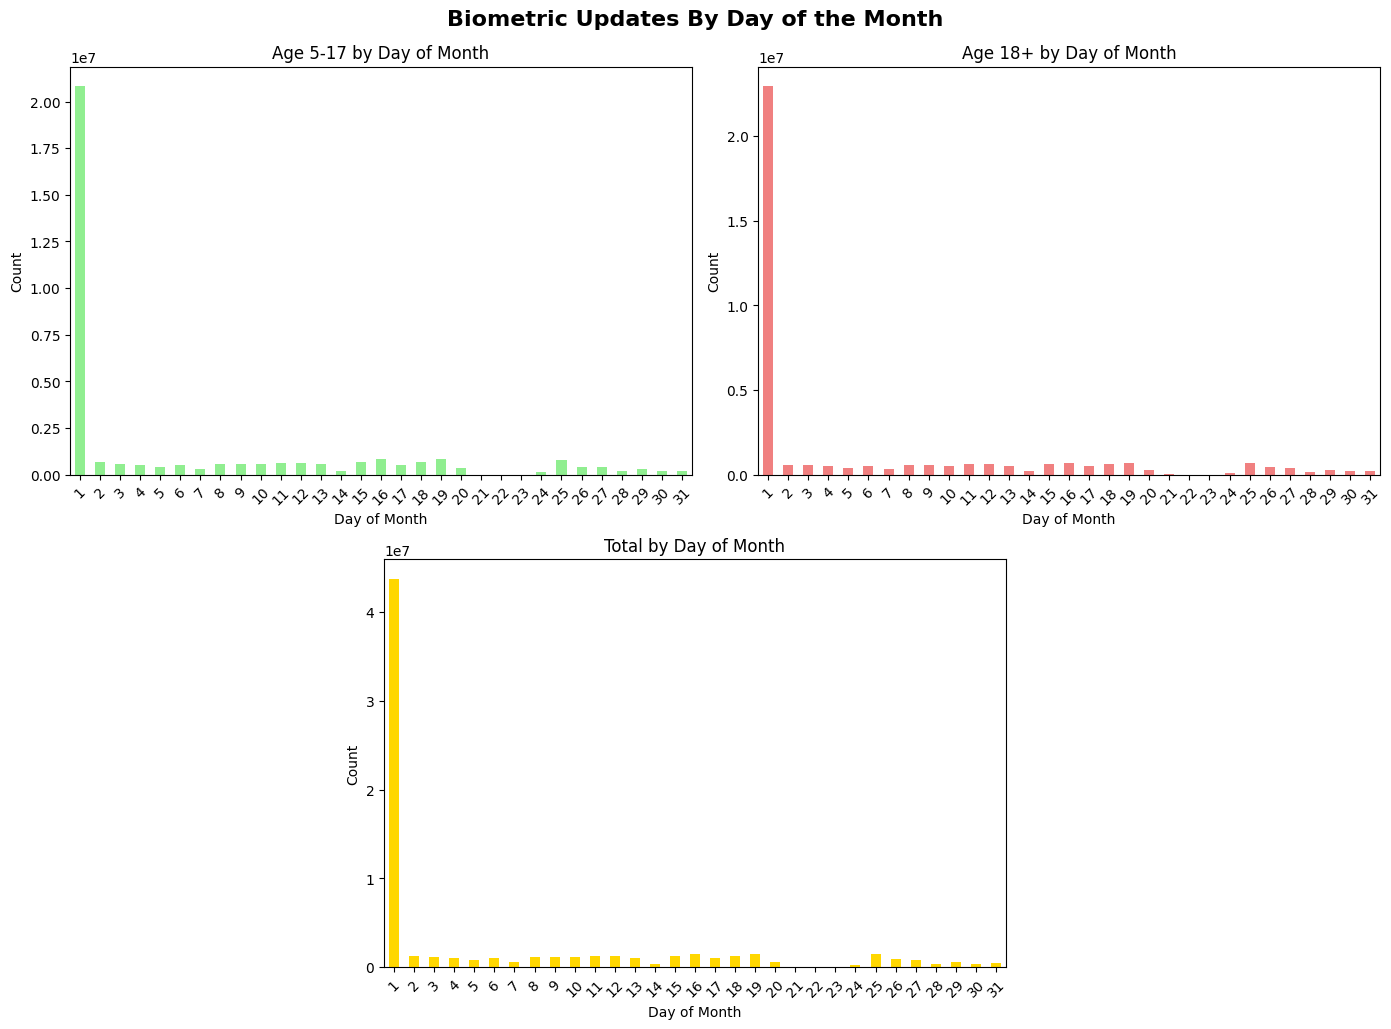

      bio_age_5_17  bio_age_17_     total
date                                     
1         20827015     22937341  43764356
2           666600       593410   1260010
3           563950       576240   1140190
4           512443       526938   1039381
5           389715       428201    817916
6           533374       500666   1034040
7           315285       322315    637600
8           552308       560107   1112415
9           559539       548019   1107558
10          571703       543083   1114786
11          643552       608791   1252343
12          653525       612173   1265698
13          595786       501867   1097653
14          199267       208425    407692
15          680366       609900   1290266
16          826467       703063   1529530
17          549916       497566   1047482
18          672431       611352   1283783
19          819264       723914   1543178
20          360208       263532    623740
21           13112        20295     33407
22             763          957   

In [50]:
# Group by day of month and sum all age groups
day_grouped = df.groupby(df['date'].dt.day)[['bio_age_5_17', 'bio_age_17_', 'total']].sum()

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

day_grouped['bio_age_5_17'].plot(kind='bar', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by Day of Month')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Day of Month')

day_grouped['bio_age_17_'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Day of Month')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Day of Month')

day_grouped['total'].plot(kind='bar', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Day of Month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Day of Month')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Rotate x labels
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)

# Add figure title
fig.suptitle('Biometric Updates By Day of the Month', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(day_grouped)

# Geographical Analysis

State-Wise Grouping

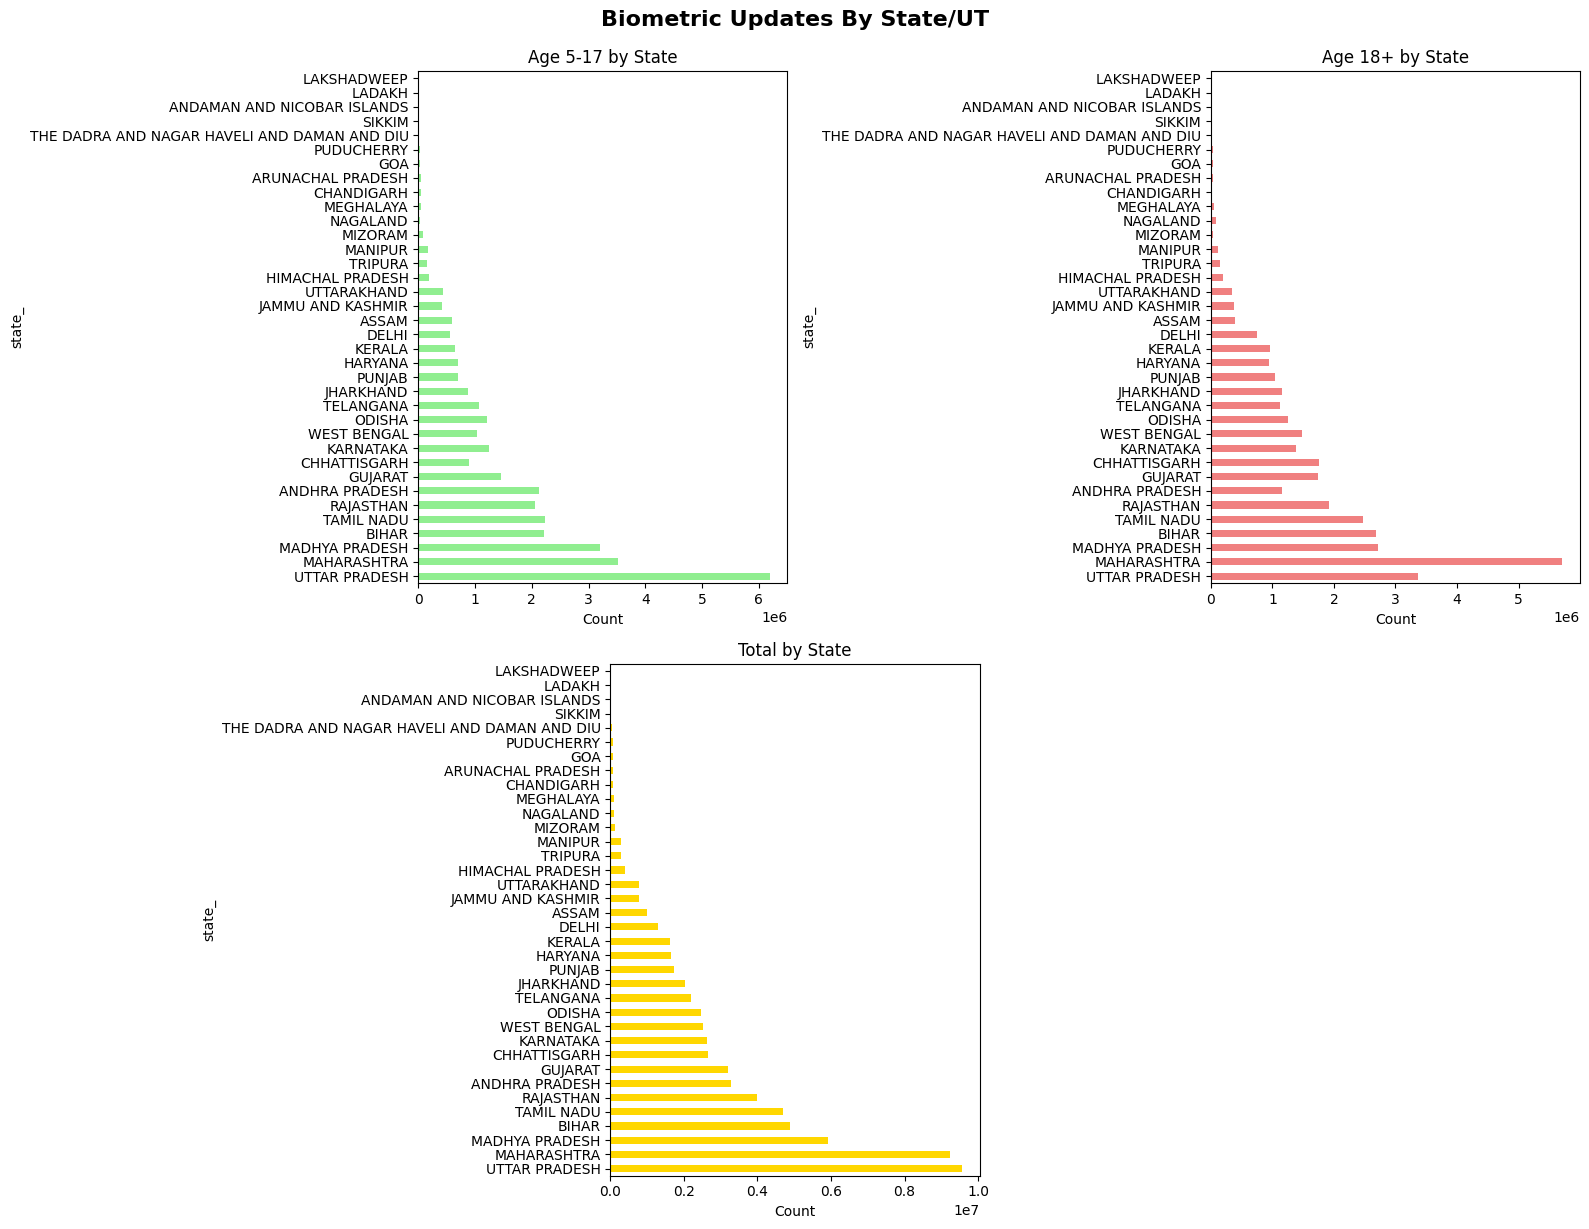

                                              bio_age_5_17  bio_age_17_  \
state_                                                                    
UTTAR PRADESH                                      6197335      3366091   
MAHARASHTRA                                        3512714      5713428   
MADHYA PRADESH                                     3200117      2723654   
BIHAR                                              2207627      2688885   
TAMIL NADU                                         2227898      2473023   
RAJASTHAN                                          2064147      1926441   
ANDHRA PRADESH                                     2131183      1150637   
GUJARAT                                            1460268      1734975   
CHHATTISGARH                                        884555      1764179   
KARNATAKA                                          1244999      1390955   
WEST BENGAL                                        1040506      1484082   
ODISHA                   

In [38]:
# Group by state and sum all age groups
state_grouped = df.groupby('state_')[['bio_age_5_17', 'bio_age_17_',  'total']].sum().sort_values('total', ascending=False)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

state_grouped['bio_age_5_17'].plot(kind='barh', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by State')
axes[0, 0].set_xlabel('Count')

state_grouped['bio_age_17_'].plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by State')
axes[0, 1].set_xlabel('Count')


state_grouped['total'].plot(kind='barh', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by State')
axes[1, 0].set_xlabel('Count')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Biometric Updates By State/UT', fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(state_grouped)

In [39]:
base_colors = {
    'bio_age_5_17': 'lightgreen',
    'bio_age_17_': 'lightcoral',
    'total': 'gold'
}
rename = {
    'bio_age_5_17': 'Age 5-17',
    'bio_age_17_': 'Age 18+',
    'total': 'Total'
}
cols = ['bio_age_5_17', 'bio_age_17_', 'total']


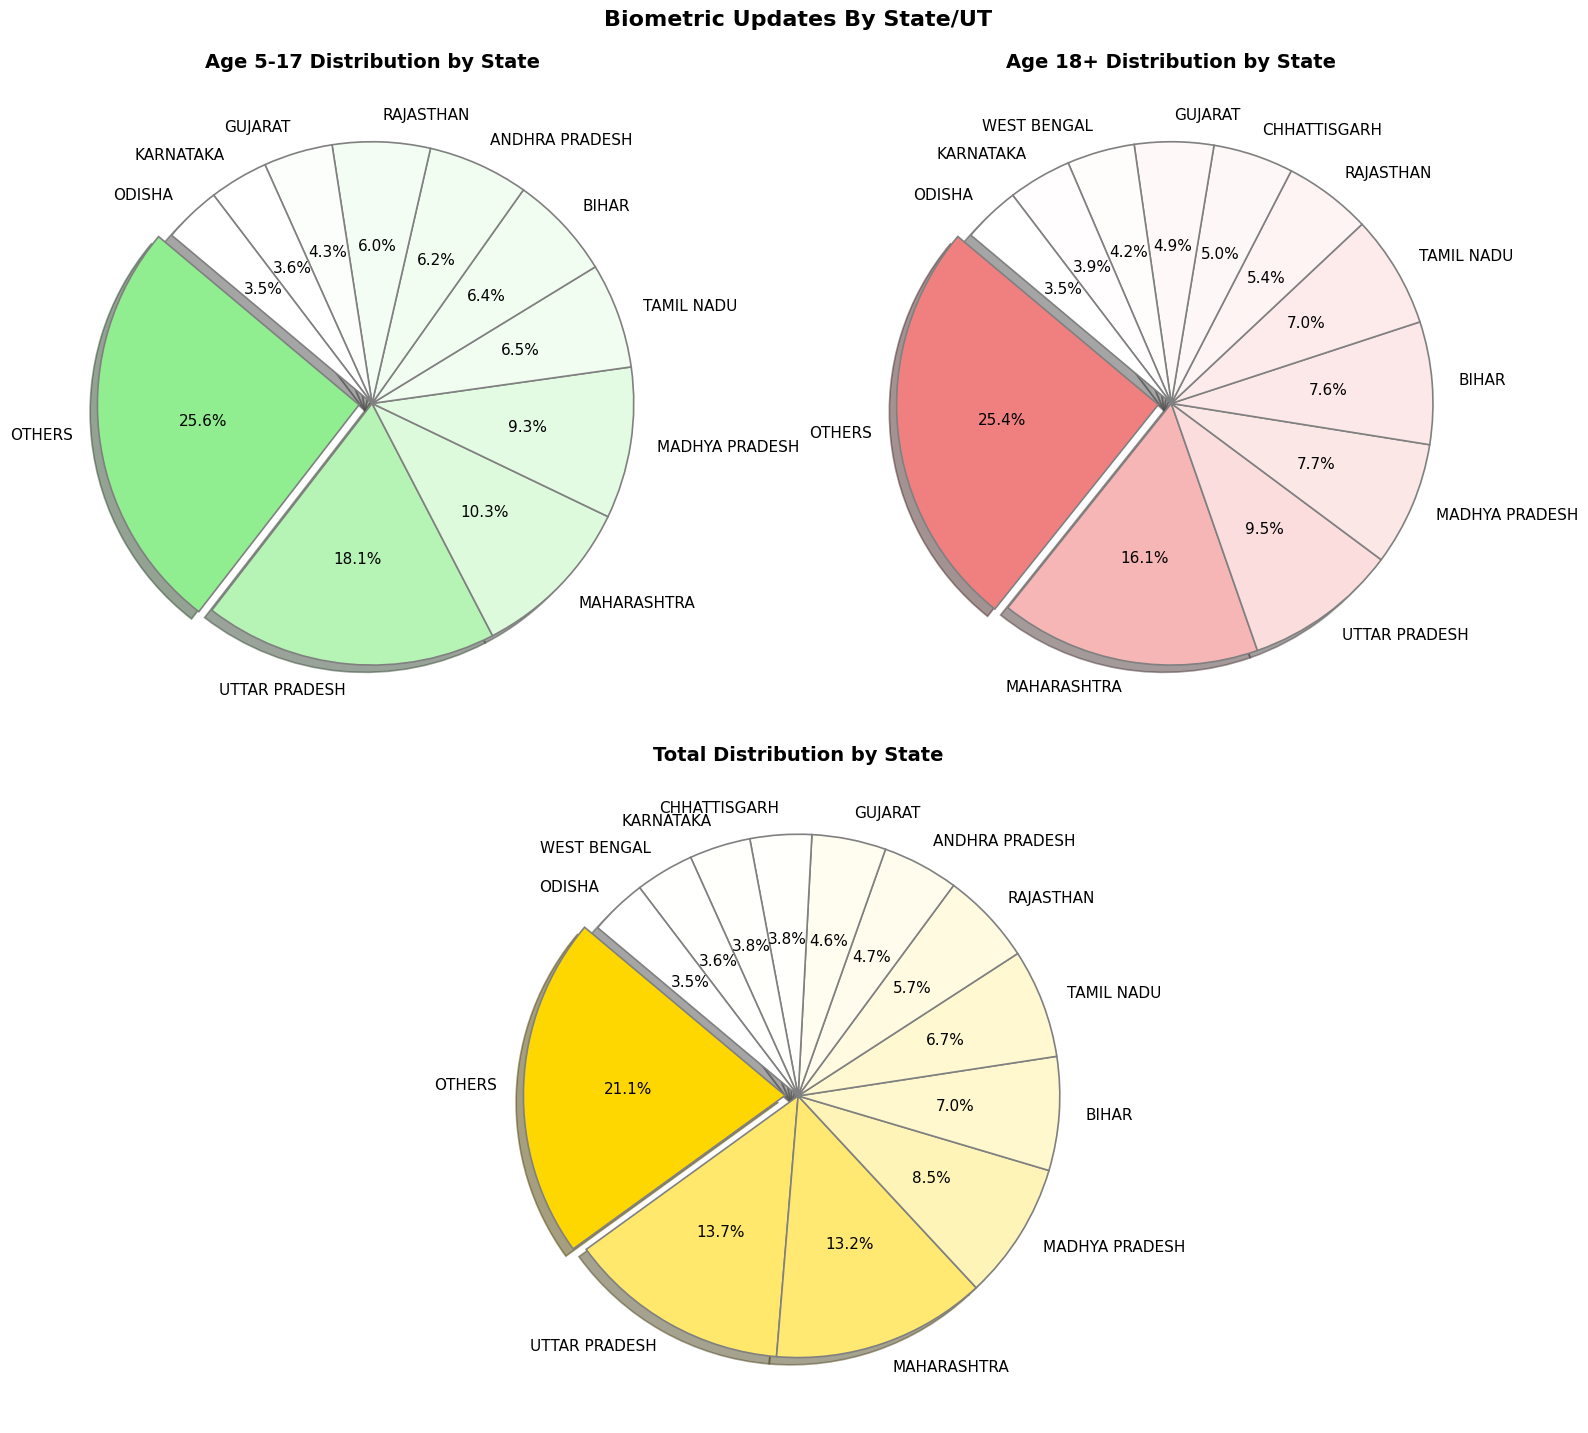

In [49]:

threshold_pct = 3.5  # Values below 3.5% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = state_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Create color shades: darker for higher %, lighter for lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by State", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Biometric Updates By State/UT', fontsize=16, fontweight='bold', y=1.02)

plt.show()


Analyzing For Delhi

In [41]:
delhi = df[df['state_']=="DELHI"]
print(delhi.shape)
delhi = delhi.drop(columns=['state_'])
print(delhi.shape)
print(len(delhi['district_'].unique()))

(9259, 10)
(9259, 9)
11


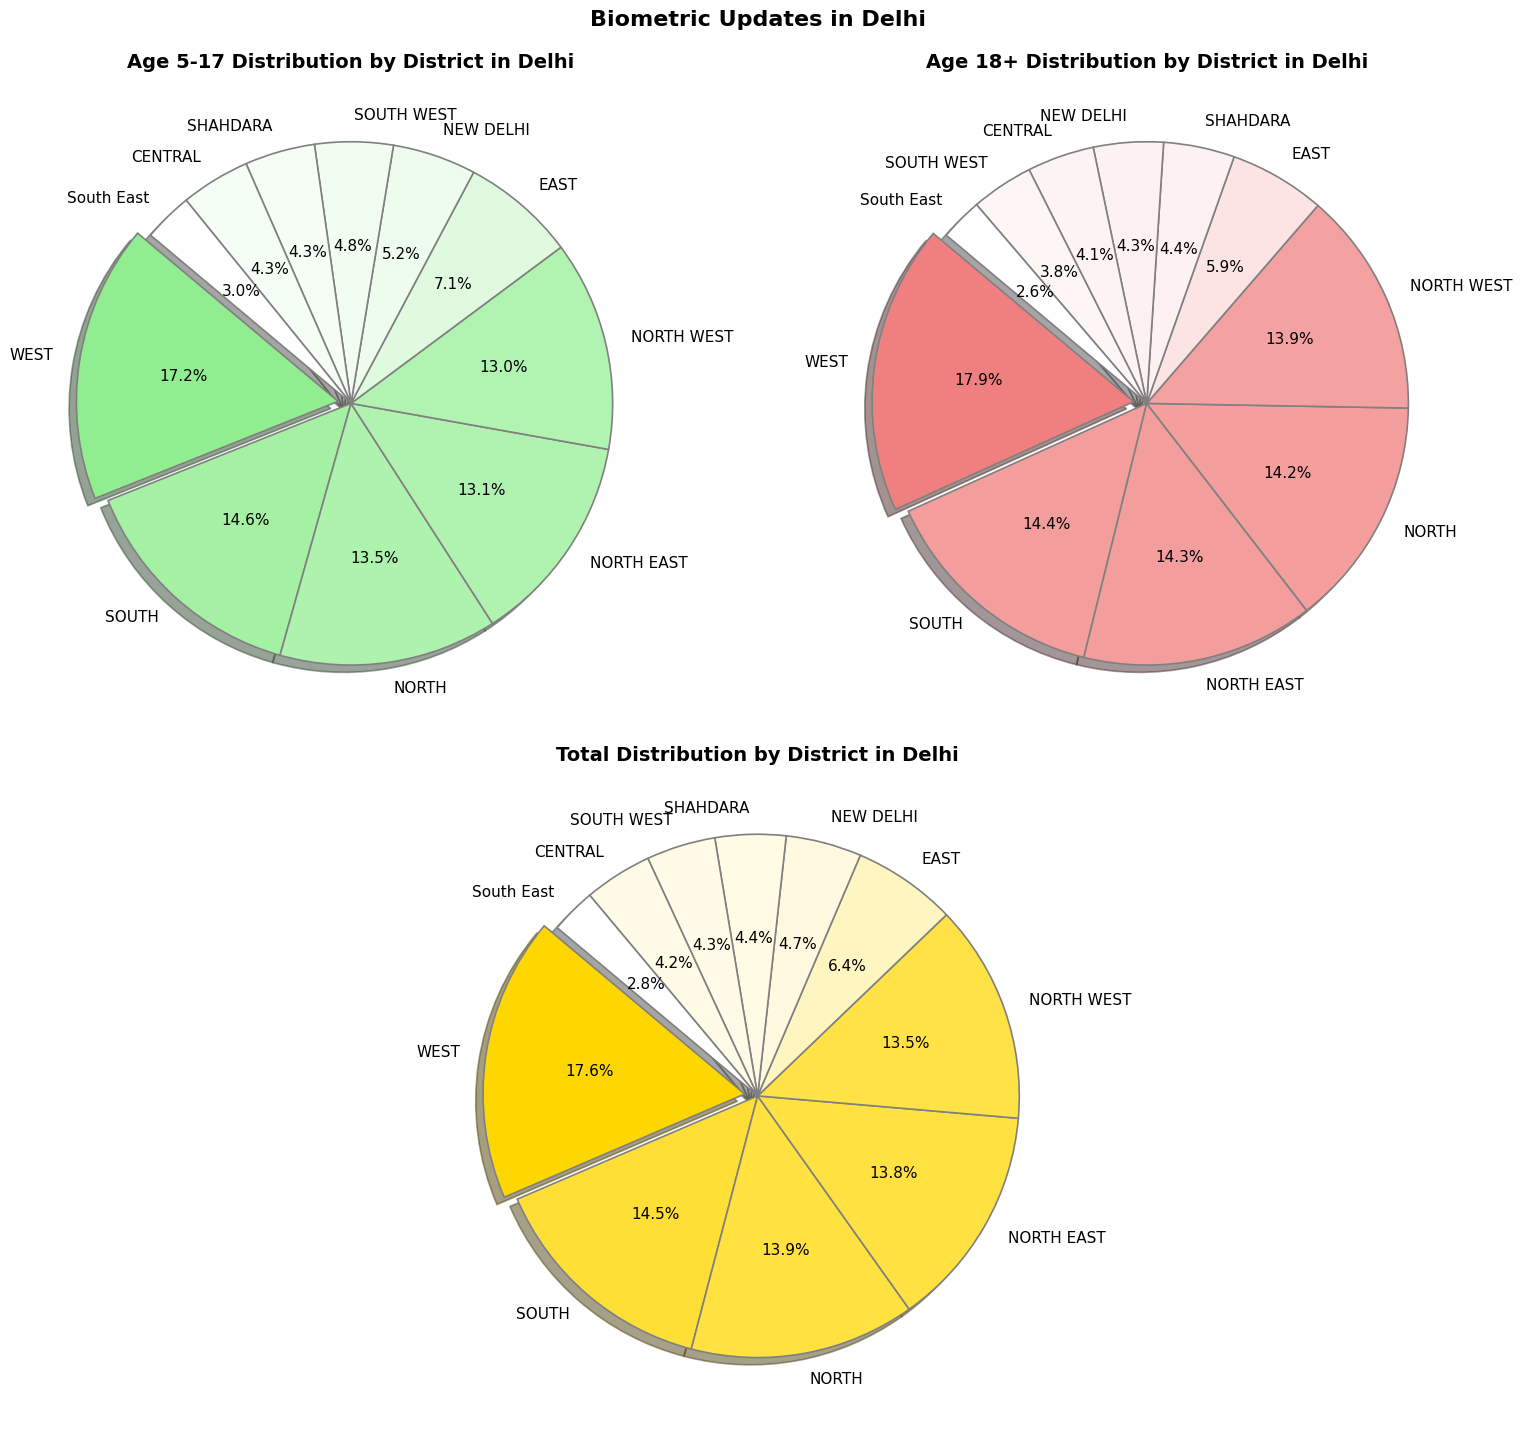

In [42]:
# Group Delhi by district and sum all age groups
delhi_district_grouped = delhi.groupby('district_')[['bio_age_5_17', 'bio_age_17_', 'total']].sum().sort_values('total', ascending=False)

threshold_pct = 2  # Values below 2% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = delhi_district_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by District in Delhi", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Biometric Updates in Delhi', fontsize=16, fontweight='bold', y=1.02)

plt.show()

NCR-Analysis

In [43]:
'''
Fetched NCR list from https://ncrpb.nic.in/ncrconstituent.html
'''
NCR = 'CENTRAL,EAST,NORTH,NORTH EAST,NORTH WEST,NEW DELHI,SOUTH,SOUTH EAST,SOUTH WEST,SHAHDARA,WEST,FARIDABAD,GURUGRAM,SONIPAT,PANIPAT,JHAJJAR,ROHTAK,REWARI,NUH,PALWAL,KURUKSHETRA,KAITHAL,KARNAL,AMBALA,PANCHKULA,GHAZIABAD,GAUTAM BUDDHA NAGAR,BULANDSHAHR,MEERUT,BAGHPAT,HAPUR,MUZAFFARNAGAR,SHAMLI,ALWAR,BHARATPUR'
ncr_states = set(['DELHI','UTTAR PRADESH','RAJASTHAN','HARYANA'])
ncr_districts = set(NCR.split(','))

In [44]:
# Filter data for NCR states and districts
ncr_df = df[(df['state_'].isin(ncr_states)) & (df['district_'].isin(ncr_districts))]
print(f'NCR dataframe shape: {ncr_df.shape}')
print(f'NCR states: {ncr_df["state_"].unique()}')
print(f'NCR districts count: {ncr_df["district_"].nunique()}')

NCR dataframe shape: (45787, 10)
NCR states: ['HARYANA' 'DELHI' 'UTTAR PRADESH' 'RAJASTHAN']
NCR districts count: 34


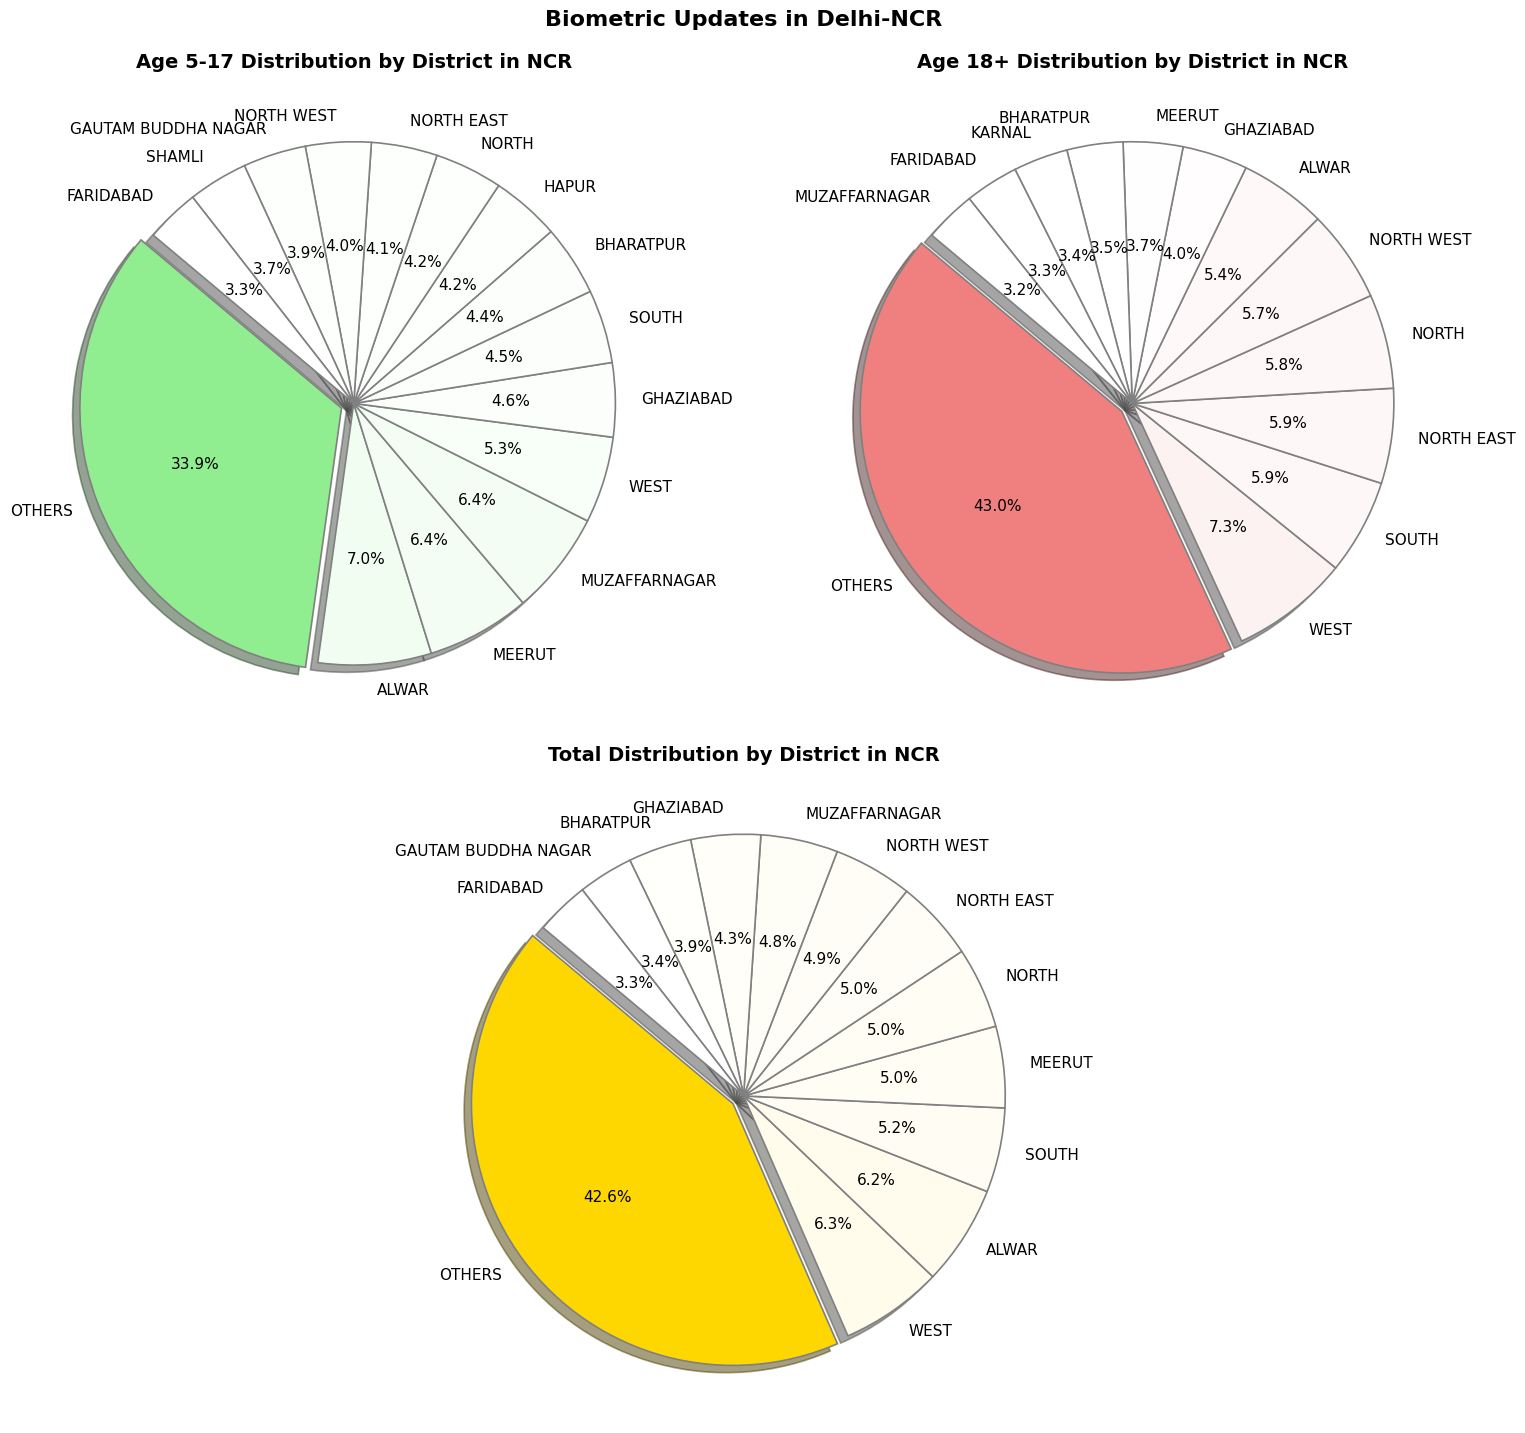

In [45]:
# Group NCR by district and sum all age groups
ncr_district_grouped = ncr_df.groupby('district_')[['bio_age_5_17', 'bio_age_17_', 'total']].sum().sort_values('total', ascending=False)
threshold_pct = 3  # Values below 3% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = ncr_district_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by District in NCR", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Biometric Updates in Delhi-NCR', fontsize=16, fontweight='bold', y=1.02)

plt.show()

Region-Wise grouping

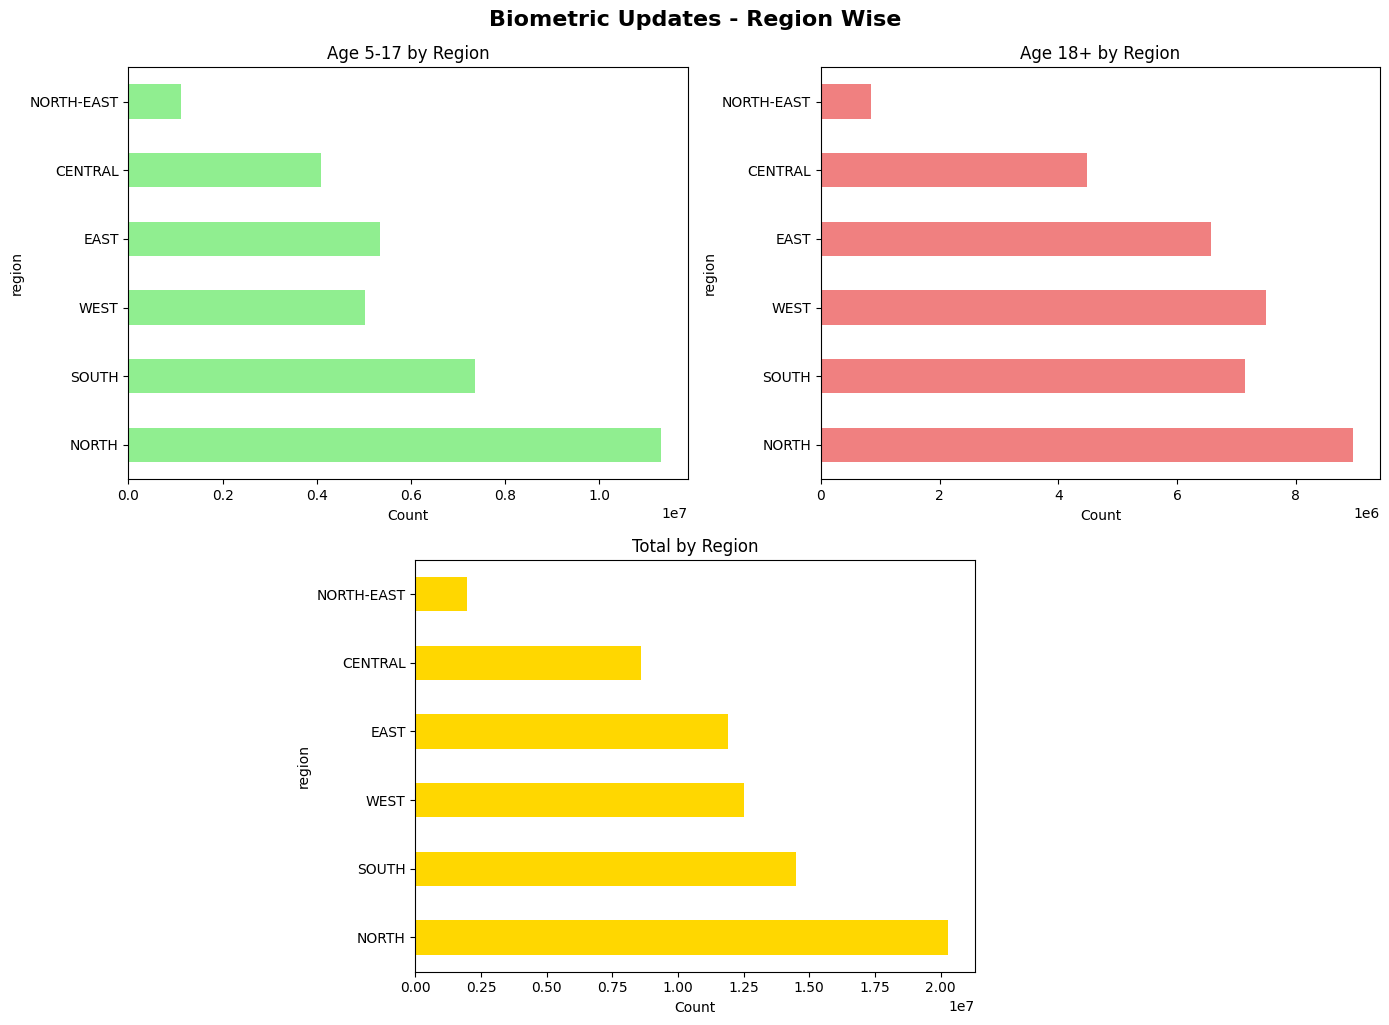

            bio_age_5_17  bio_age_17_     total
region                                         
NORTH           11309649      8971052  20280701
SOUTH            7354244      7146787  14501031
WEST             5023975      7506346  12530321
EAST             5336652      6576807  11913459
CENTRAL          4084672      4487833   8572505
NORTH-EAST       1117663       847415   1965078


In [46]:
# Group by region and sum all age groups
region_grouped = df.groupby('region')[['bio_age_5_17', 'bio_age_17_', 'total']].sum().sort_values('total', ascending=False)

# Create comparative bar graphs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

region_grouped['bio_age_5_17'].plot(kind='barh', ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Age 5-17 by Region')
axes[0, 0].set_xlabel('Count')

region_grouped['bio_age_17_'].plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age 18+ by Region')
axes[0, 1].set_xlabel('Count')

region_grouped['total'].plot(kind='barh', ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Total by Region')
axes[1, 0].set_xlabel('Count')


fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Biometric Updates - Region Wise', fontsize=16, fontweight='bold', y=1.02)

plt.show()
print(region_grouped)

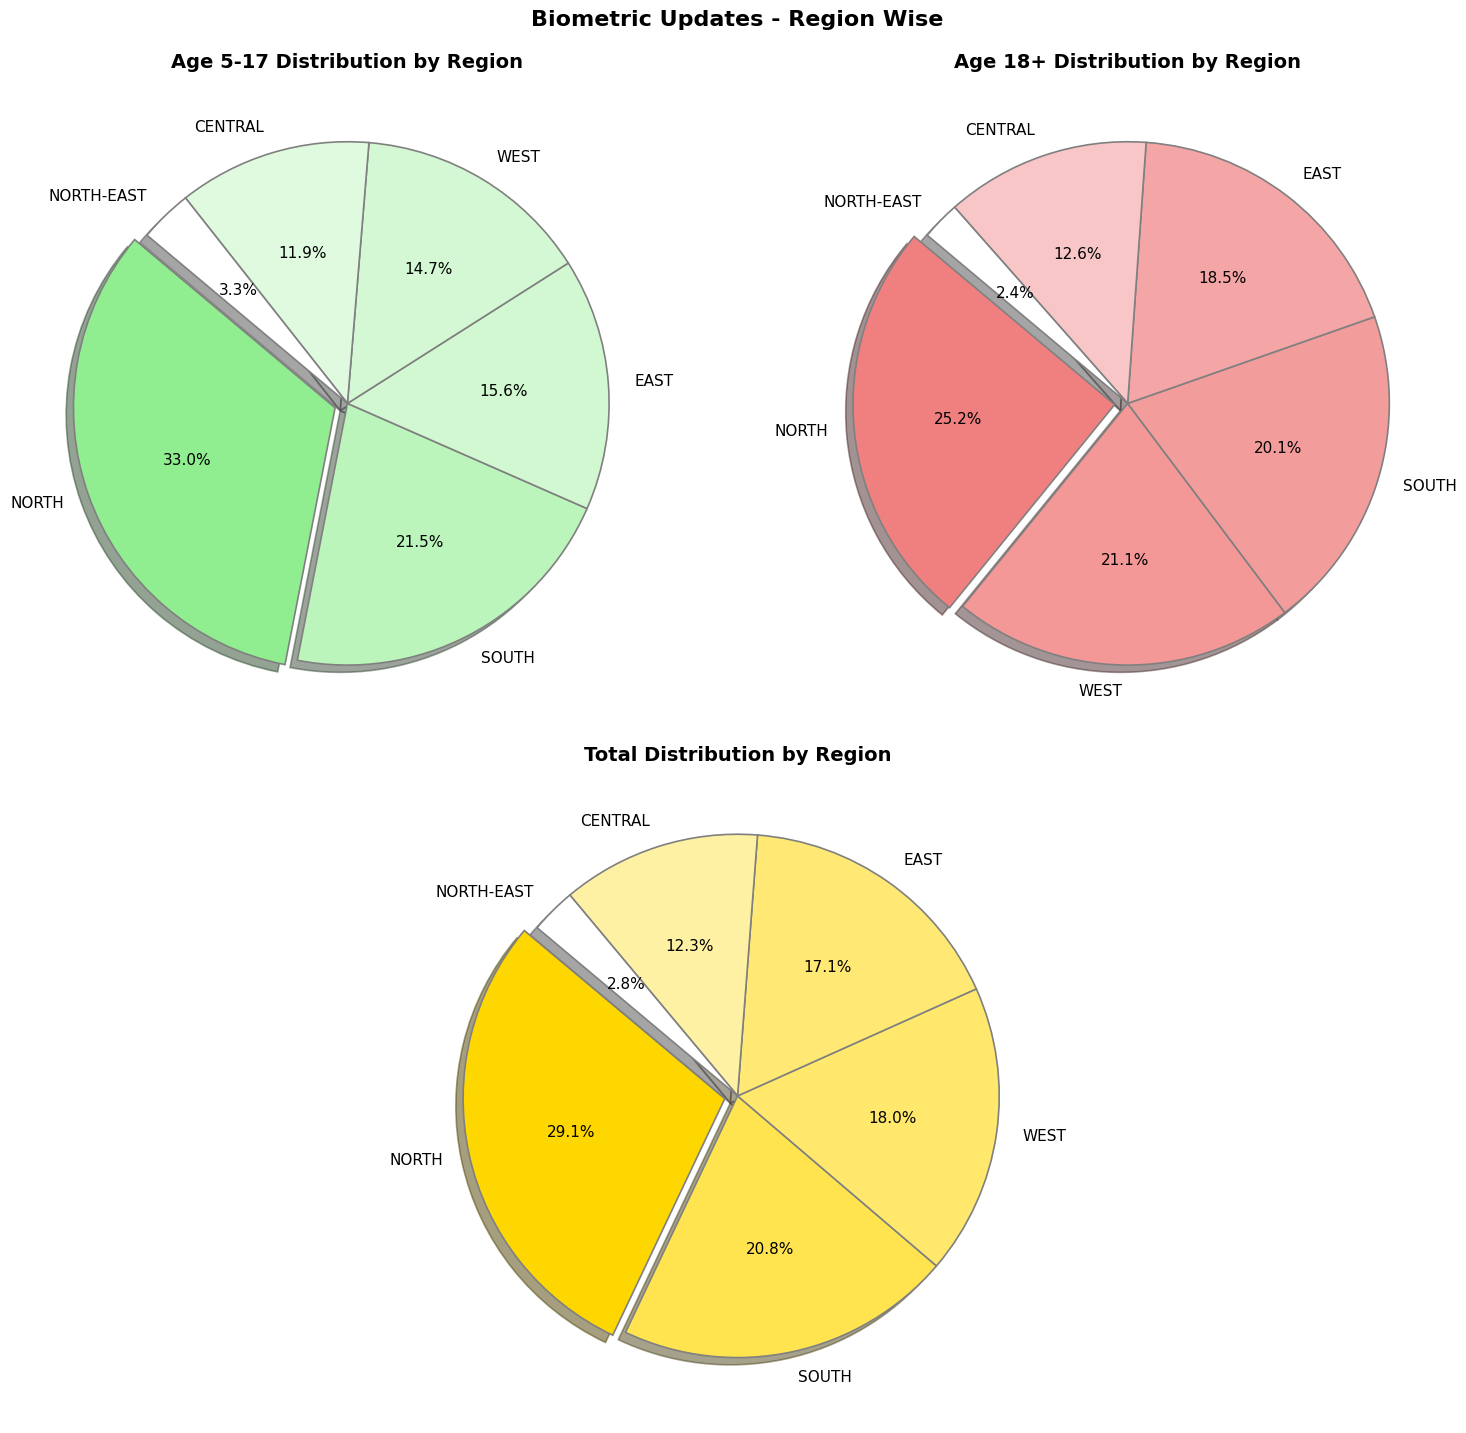

In [48]:
threshold_pct = 2  # Values below 2% go to OTHERS

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for ax, col in zip(axes.flat, cols):
    values = region_grouped[col]
    total_sum = values.sum()

    # Split major vs negligible
    major = values[values / total_sum * 100 >= threshold_pct]
    others = values[values / total_sum * 100 < threshold_pct].sum()
    if others > 0:
        major = pd.concat([major, pd.Series({'OTHERS': others})])

    major = major.sort_values(ascending=False)
    
    # Explode largest slice slightly
    explode = [0.05 if v == major.max() else 0 for v in major]

    # Gradient shading: darker = higher %, lighter = lower %
    norm = mcolors.Normalize(vmin=major.min(), vmax=major.max())
    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_colors[col]])
    colors = [cmap(norm(v)) for v in major]

    # Plot pie
    ax.pie(
        major.values,
        labels=major.index,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.2},
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{rename[col]} Distribution by Region", fontsize=14, weight='bold')

fig.delaxes(axes[1, 1])

# Apply layout first
plt.tight_layout()

# Center the bottom subplot
pos = axes[1, 0].get_position()
axes[1, 0].set_position([
    0.5 - pos.width / 2,
    pos.y0,
    pos.width,
    pos.height
])

# Add figure title
fig.suptitle('Biometric Updates - Region Wise', fontsize=16, fontweight='bold', y=1.02)

plt.show()
